# This is a Heading
    ## Train on 0-4 but predict on 5-9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Flatten, Activation, Flatten, Convolution2D, Dropout, MaxPooling2D

In [3]:
from keras.models import Sequential
from keras.utils import np_utils

In [4]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [5]:
n=20000 #No.of train examples
N=y_test.shape[0] #No.of test examples

x_train_zerotofour = []
x_test_zerotofour = []
y_train_zerotofour = []
y_test_zerotofour = []

x_train_fivetonine = []
x_test_fivetonine = []
y_train_fivetonine = []
y_test_fivetonine = []

for i in range(n):
    if y_train[i]<5:
        x_train_zerotofour.append(x_train[i] /255 )
        y_train_zerotofour.append(y_train[i])
    else:
        x_train_fivetonine.append(x_train[i]/255 )
        y_train_fivetonine.append(y_train[i])
        
#FOR TESTING VALUES        
for i in range(N):
    if y_test[i]<5:
        x_test_zerotofour.append(x_test[i] /255)
        y_test_zerotofour.append(y_test[i])
    else:
        x_test_fivetonine.append(x_test[i] /255 )
        y_test_fivetonine.append(y_test[i])

In [6]:
X_train_zerotofour=np.asarray(x_train_zerotofour).reshape(-1,28,28,1)
X_test_zerotofour=np.asarray(x_test_zerotofour).reshape(-1,28,28,1)

X_train_fivetonine=np.asarray(x_train_fivetonine).reshape(-1,28,28,1)
X_test_fivetonine=np.asarray(x_test_fivetonine).reshape(-1,28,28,1)

Y_train_zerotofour=np_utils.to_categorical(np.asarray(y_train_zerotofour),num_classes=5)
Y_test_zerotofour=np_utils.to_categorical(np.asarray(y_test_zerotofour),num_classes=5)

Y_train_fivetonine=np_utils.to_categorical(np.asarray(y_train_fivetonine),num_classes=10)
Y_test_fivetonine=np_utils.to_categorical(np.asarray(y_test_fivetonine),num_classes=10)

In [7]:
print(X_train_zerotofour.shape, X_test_zerotofour.shape, Y_train_zerotofour.shape, Y_test_zerotofour.shape )

(10225, 28, 28, 1) (5139, 28, 28, 1) (10225, 5) (5139, 5)


In [8]:
print(X_train_fivetonine.shape, X_test_fivetonine.shape, Y_train_fivetonine.shape, Y_test_fivetonine.shape )

(9775, 28, 28, 1) (4861, 28, 28, 1) (9775, 10) (4861, 10)


In [15]:
model = Sequential()
model.add(Convolution2D(32,5, input_shape=(28,28,1),activation='relu'))
model.add(Convolution2D(16,5,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(8,3,activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
___________________________

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
import time
import datetime

start=datetime.datetime.now()
time.sleep(5)
end=datetime.datetime.now()
print(end-start)

0:00:05.005332


In [25]:
start=datetime.datetime.now()

model.fit(X_train_zerotofour, Y_train_zerotofour,
         epochs=5,batch_size=100,shuffle=True,verbose=2,
         validation_data=(X_test_zerotofour, Y_test_zerotofour))

end=datetime.datetime.now()
print('\n'end-start)

Instructions for updating:
Use tf.cast instead.
Train on 10225 samples, validate on 5139 samples
Epoch 1/5
 - 13s - loss: 0.3076 - acc: 0.9033 - val_loss: 0.0442 - val_acc: 0.9885
Epoch 2/5
 - 12s - loss: 0.0763 - acc: 0.9773 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 3/5
 - 12s - loss: 0.0505 - acc: 0.9839 - val_loss: 0.0178 - val_acc: 0.9947
Epoch 4/5
 - 12s - loss: 0.0424 - acc: 0.9864 - val_loss: 0.0173 - val_acc: 0.9946
Epoch 5/5
 - 12s - loss: 0.0307 - acc: 0.9900 - val_loss: 0.0177 - val_acc: 0.9942
0:01:00.749720


In [30]:
model.layers

In [32]:
for l in model.layers[:6]:
    l.trainable=False

for l in model.layers:
    print(l.trainable)

False
False
False
False
False
False
True
True
True
True


In [33]:
trans_model = Sequential(model.layers[:6])

In [34]:
trans_model.add(Dense(128))
trans_model.add(Activation('relu'))
trans_model.add(Dense(10))
trans_model.add(Activation('softmax'))
trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
__________

In [35]:
trans_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [37]:
start=datetime.datetime.now()

trans_model.fit(X_train_fivetonine, Y_train_fivetonine,
         epochs=5,batch_size=100,shuffle=True,verbose=2,
         validation_data=(X_test_fivetonine, Y_test_fivetonine))

end=datetime.datetime.now()
print('\n',end-start)

Train on 9775 samples, validate on 4861 samples
Epoch 1/5
 - 5s - loss: 0.3253 - acc: 0.8927 - val_loss: 0.0923 - val_acc: 0.9745
Epoch 2/5
 - 4s - loss: 0.1063 - acc: 0.9678 - val_loss: 0.0671 - val_acc: 0.9776
Epoch 3/5
 - 4s - loss: 0.0894 - acc: 0.9703 - val_loss: 0.0526 - val_acc: 0.9829
Epoch 4/5
 - 4s - loss: 0.0726 - acc: 0.9773 - val_loss: 0.0424 - val_acc: 0.9852
Epoch 5/5
 - 4s - loss: 0.0665 - acc: 0.9784 - val_loss: 0.0453 - val_acc: 0.9840

 0:00:22.850244


Here is the data set example:


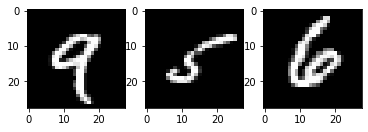

In [58]:
print('Here is the data set example:')
for i in range(1,4):
    ax = plt.subplot(1,3,i)
    plt.imshow(x_train_fivetonine[i].reshape(28,28))
    plt.gray()
plt.show()

In [57]:
print('Here are my predictions:')
y_train_fivetonine[1:4]

Here are my predictions:


[9, 5, 6]